In [6]:
import pandas as pd
data_predictions = pd.read_parquet("data_and_predictions", columns=["id", "prediction"])
data_predictions

,id,prediction
0,97m4m,0
1,q412v,0
2,rd166,1
3,rvjcf,0
4,se83q,0
...,...,...
836671,kfre9u2,0
836672,kfrjli5,0
836673,kfrn46u,0
836674,kfrn5yj,0


In [12]:
data_texts = pd.read_csv('../cleaned_mfd2_liwc_results.csv', usecols = ['id', 'cleaned_text'])
data_texts

,id,cleaned_text
0,97m4m,do you have a strong voice or a well built fr...
1,a35f5,trailer for an amazing book published decades ...
2,hk5r2,i had an appointment today with the dentist o...
3,iqimz,i created this site several months ago and i ...
4,pfzt5,hello everyone i have recently took over thi...
...,...,...
836685,kfrn5yj,i did this and now its like three years later ...
836686,kfrndk0,don t you think it s convenient that you ve c...
836687,kfrohp2,i was the same trust me when you are old...
836688,kfrojp4,thank you for your input i think fruits will...


In [13]:
merged_df = pd.merge(data_predictions, data_texts, on='id', how='inner')
merged_df

,id,prediction,cleaned_text
0,97m4m,0,do you have a strong voice or a well built fr...
1,q412v,0,nothing but opportunity exists if you are fe...
2,rd166,1,i ve been working at a horrible place for thre...
3,rvjcf,0,context last semester i was taking 11 credit...
4,se83q,0,the title pretty much says it all this whole ...
...,...,...,...
836671,kfre9u2,0,me too but im going to bed early to wake up e...
836672,kfrjli5,0,i was in the same shoes as you try to think s...
836673,kfrn46u,0,why 5 programming languages i d try to master...
836674,kfrn5yj,0,i did this and now its like three years later ...


In [18]:
cluster_0 = merged_df[merged_df.prediction == 0]
cluster_1 = merged_df[merged_df.prediction == 1]
cluster_0

,id,prediction,cleaned_text
0,97m4m,0,do you have a strong voice or a well built fr...
1,q412v,0,nothing but opportunity exists if you are fe...
3,rvjcf,0,context last semester i was taking 11 credit...
4,se83q,0,the title pretty much says it all this whole ...
5,sigw5,0,i find that writing out what i want to do and ...
...,...,...,...
836671,kfre9u2,0,me too but im going to bed early to wake up e...
836672,kfrjli5,0,i was in the same shoes as you try to think s...
836673,kfrn46u,0,why 5 programming languages i d try to master...
836674,kfrn5yj,0,i did this and now its like three years later ...


In [19]:
def tokenize_words(text):
    '''
    Tokenizes text into list of words

    Inputs:
      - text (str): text

    Outputs:
      (list): list of relevant words contained in the title
    '''

    #I asked ChatGPT: "create me a good stop words list including pronouns,
    #auxiliary verbs, etc"
    stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she',
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
    'these', 'those', 'am', 'is', 'are',  'was', 'were', 'be', 'been', 'being',
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both',
    'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will',
    'just', 'don', 'should', 'now']

    words_list = []

    words = title.split()

    for word in words:
        if len(word) == 0:
            continue

        if word in stop_words:
            continue

        words_list.append(word)

    return words_list


def count_words(data):
    '''
    Create a dictionary that maps words with their frequency on all articles'
    titles

    Inputs:
      - data (series): articles' titles

    Outputs:
      - (dict): dictionary mapping words with their frequencies

    '''

    title_words_counts = {}

    for entry in data:
        row_words = tokenize_words(entry)

        for word in row_words:
            title_words_counts[word] = title_words_counts.get(word, 0) + 1

    #I asked ChatGPT how to sort by value

    sorted_dict= dict(sorted(title_words_counts.items(), key=lambda item: item[1],
                                                                  reverse=True))
    return sorted_dict

In [21]:
#Apply function to count words on titles
dict_cluster0 = count_words(cluster_0["cleaned_text"])
dict_cluster1 = count_words(cluster_1["cleaned_text"])

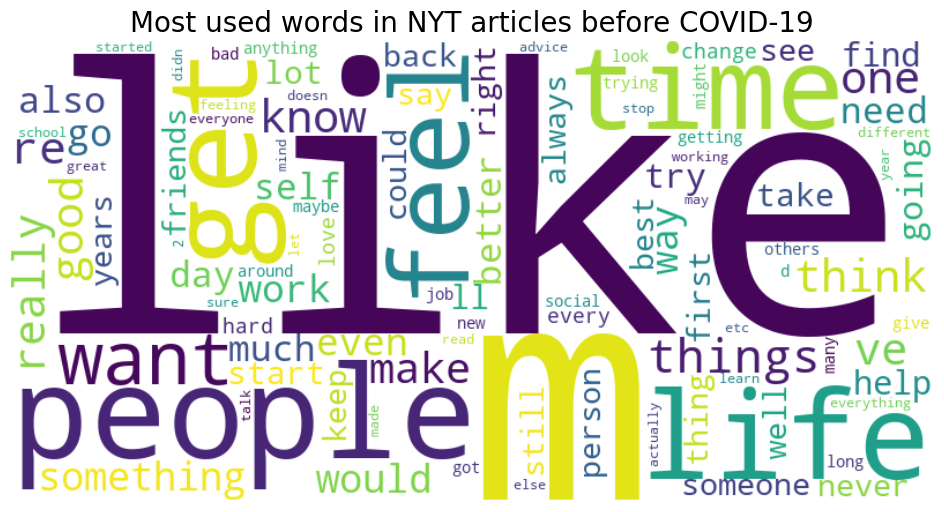

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create a WordCloud object with customized parameters
wordcloud = WordCloud(width=800, height=400, background_color='white',
                                                  colormap='viridis',
                      max_words=100, contour_color='steelblue', contour_width=2)

#NEW YORK TIMES

wordcloud.generate_from_frequencies(dict_cluster0)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most used words in NYT articles before COVID-19', fontsize=20)
plt.axis('off')
plt.show()

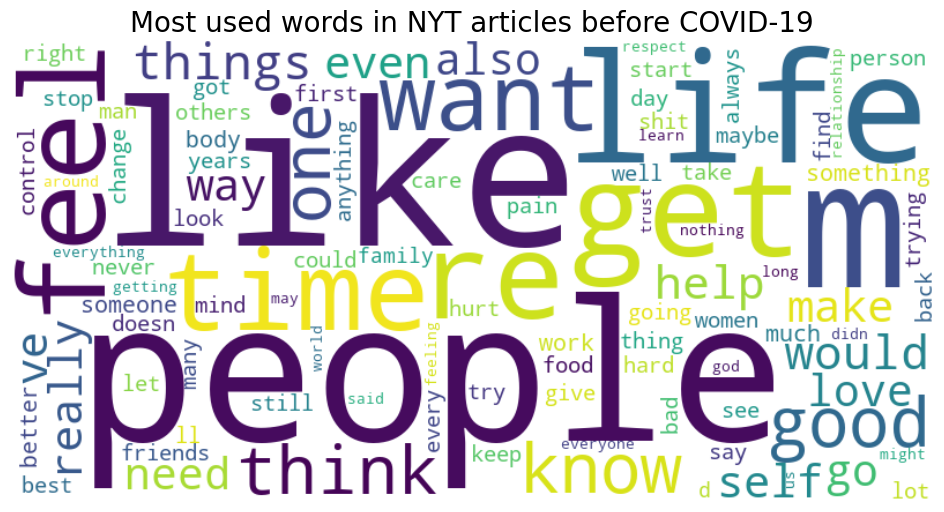

In [25]:
# Create a WordCloud object with customized parameters
wordcloud = WordCloud(width=800, height=400, background_color='white',
                                                  colormap='viridis',
                      max_words=100, contour_color='steelblue', contour_width=2)

#NEW YORK TIMES

wordcloud.generate_from_frequencies(dict_cluster1)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most used words in NYT articles before COVID-19', fontsize=20)
plt.axis('off')
plt.show()

**Try